In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import wilcoxon
from utils import *

In [2]:
results_path = '/home/psachdeva/fits/uoineuro/classification/left_right_basal_ganglia_10f.h5'

In [3]:
results = h5py.File(results_path, 'r')

In [4]:
gp_baseline_coefs = results['gp/baseline/coefs'][:]
gp_uoi_coefs = results['gp/uoi/coefs'][:]
snr_baseline_coefs = results['snr/baseline/coefs'][:]
snr_uoi_coefs = results['snr/uoi/coefs'][:]

Text(0.5, 1, '\\textbf{UoI}')

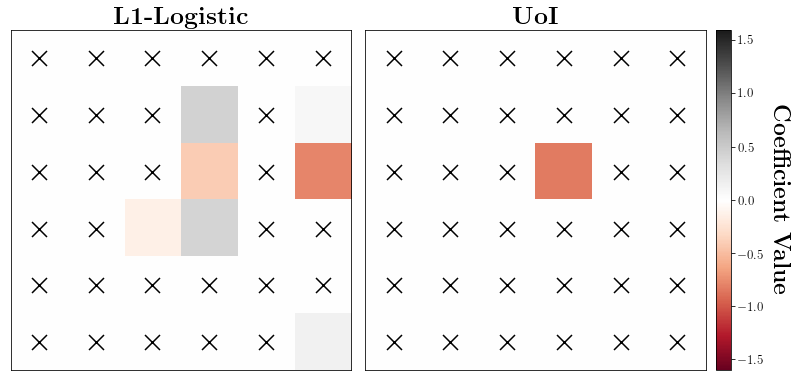

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 12))

_, _, baseline_img, uoi_img = plot_basal_ganglia_coefs(
    snr_baseline_coefs,
    snr_uoi_coefs,
    row_columns=(6, 6),
    fax=(fig, axes),
    vmin=-1.6,
    vmax=1.6
)

plt.tight_layout()

cax = fig.add_axes([1.0, 0.3035, 0.02, 0.394])
cb = fig.colorbar(baseline_img, cax=cax, orientation='vertical')
cb.ax.tick_params(labelsize=13)
cb.set_label(r'\textbf{Coefficient Value}',
             labelpad=25,
             rotation=270,
             fontsize=23)
axes[0].set_title(r'\textbf{L1-Logistic}', fontsize=25)
axes[1].set_title(r'\textbf{UoI}', fontsize=25)

Text(290.54545454545456, 0.5, '\\textbf{UoI}')

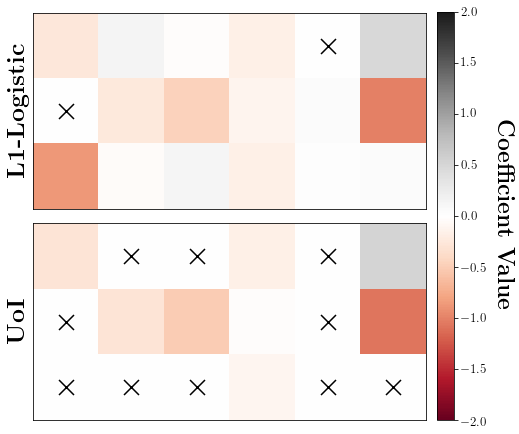

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

_, _, baseline_img, uoi_img = plot_basal_ganglia_coefs(
    gp_baseline_coefs,
    gp_uoi_coefs,
    row_columns=(3, 6),
    fax=(fig, axes),
    vmin=-2,
    vmax=2
)

plt.tight_layout()

cax = fig.add_axes([0.74, 0.033, 0.02, 0.945])
cb = fig.colorbar(baseline_img, cax=cax, orientation='vertical')
cb.ax.tick_params(labelsize=13)
cb.set_label(r'\textbf{Coefficient Value}',
             labelpad=25,
             rotation=270,
             fontsize=23)

axes[0].set_ylabel(r'\textbf{L1-Logistic}', fontsize=25)
axes[1].set_ylabel(r'\textbf{UoI}', fontsize=25)

In [7]:
# selection ratios
gp_baseline_srs = np.count_nonzero(gp_baseline_coefs, axis=1) / gp_baseline_coefs.shape[1]
gp_uoi_srs = np.count_nonzero(gp_uoi_coefs, axis=1) / gp_baseline_coefs.shape[1]
snr_baseline_srs = np.count_nonzero(snr_baseline_coefs, axis=1) / snr_baseline_coefs.shape[1]
snr_uoi_srs = np.count_nonzero(snr_uoi_coefs, axis=1) / snr_baseline_coefs.shape[1]

In [13]:
# scores
gp_baseline_acc = results['gp/baseline/scores'][:]
gp_uoi_acc = results['gp/uoi/scores'][:]
snr_baseline_acc = results['snr/baseline/scores'][:]
snr_uoi_acc = results['snr/uoi/scores'][:]

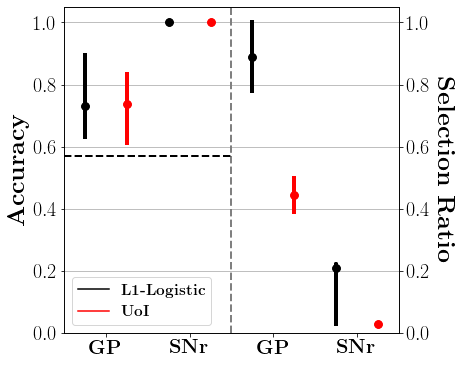

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.boxplot(
    positions=[0, 2],
    x=[gp_baseline_acc, snr_baseline_acc],
    widths=0,
    boxprops={'linewidth': 4, 'color': 'k'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'k'},
    whiskerprops={'linewidth': 4, 'color': 'k'},
    showfliers=False,
)

ax.boxplot(
    positions=[1, 3],
    x=[gp_uoi_acc, snr_uoi_acc],
    widths=0,
    boxprops={'linewidth': 4, 'color': 'r'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'r'},
    whiskerprops={'linewidth': 4, 'color': 'r'},
    showfliers=False
)

ax.boxplot(
    positions=[4, 6],
    x=[gp_baseline_srs, snr_baseline_srs],
    widths=0,
    boxprops={'linewidth': 4, 'color': 'k'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'k'},
    whiskerprops={'linewidth': 4, 'color': 'k'},
    showfliers=False
)

ax.boxplot(
    positions=[5, 7],
    x=[gp_uoi_srs, snr_uoi_srs],
    widths=0,
    boxprops={'linewidth': 4, 'color': 'r'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'r'},
    whiskerprops={'linewidth': 4, 'color': 'r'},
    showfliers=False
)

ax.grid('on', axis='y')
ax.axvline(
    x=3.5,
    linestyle='--',
    linewidth=2,
    color='gray')
ax.axhline(
    y=106./186, xmin=0, xmax=0.5,
    linestyle='--',
    linewidth=2,
    color='black')

ax.set_xticks([0.5, 2.5, 4.5, 6.5])
ax.set_xticklabels([r'\textbf{GP}', r'\textbf{SNr}', r'\textbf{GP}', r'\textbf{SNr}'])

ax2 = ax.twinx()

ax.set_ylim([0, 1.05])
ax2.set_ylim([0, 1.05])

ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)

ax.set_ylabel(r'\textbf{Accuracy}', fontsize=25)
ax2.set_ylabel(r'\textbf{Selection Ratio}',
               fontsize=25,
               labelpad=25,
               rotation=270)

ax.plot([], [], color='k', label=r'\textbf{L1-Logistic}')
ax.plot([], [], color='r', label=r'\textbf{UoI}')
ax.legend(loc=3,
          prop={'size': 15.5})


In [15]:
print(wilcoxon(gp_baseline_srs, gp_uoi_srs))
print(wilcoxon(snr_baseline_srs, snr_uoi_srs))

WilcoxonResult(statistic=0.0, pvalue=0.004920313984442514)
WilcoxonResult(statistic=0.0, pvalue=0.0157641152996124)


/home/psachdeva/anaconda3/envs/neuro/lib/python3.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [17]:
print(wilcoxon(gp_baseline_acc, gp_uoi_acc))
print(wilcoxon(snr_baseline_acc, snr_uoi_acc))

WilcoxonResult(statistic=14.0, pvalue=0.5711260675200034)
WilcoxonResult(statistic=0.0, pvalue=nan)
